/tmp/ipykernel_1386923/146124787.py:87: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  datatxt_all = pd.read_csv('primes_data_150000.txt')



Processing dataset: Primes +1
Original max x = 31278
Calculated Threshold for Primes +1: 6195.5


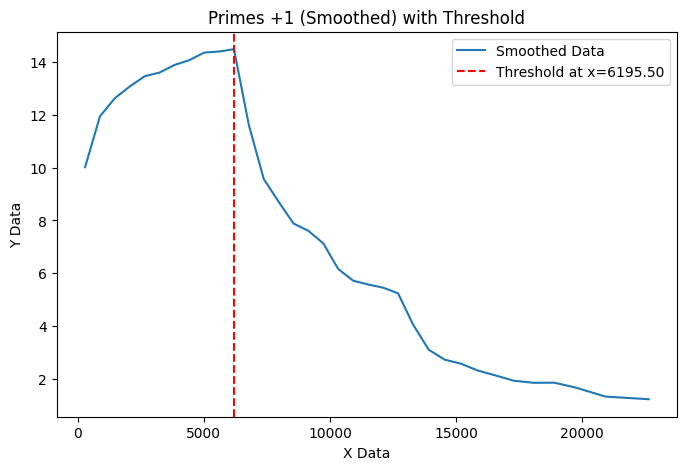

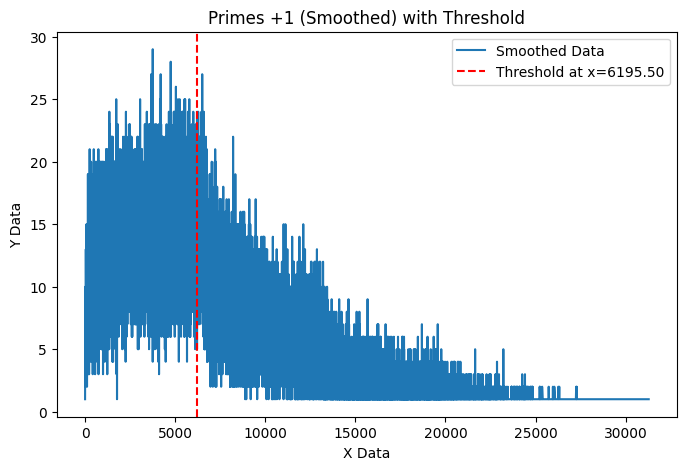


Processing dataset: Primes -1
Original max x = 31543
Calculated Threshold for Primes -1: 6248.0


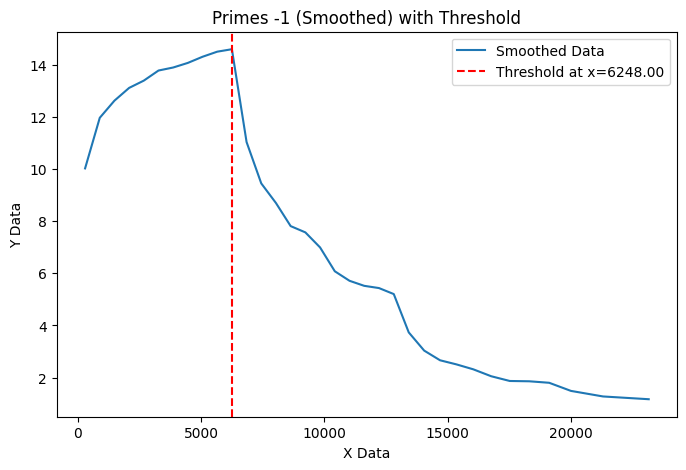

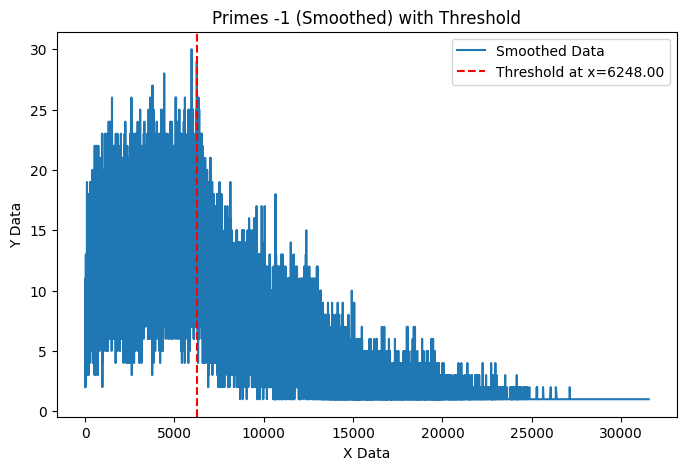


Processing dataset: Twins
Original max x = 6708
Calculated Threshold for Twins: 314.5


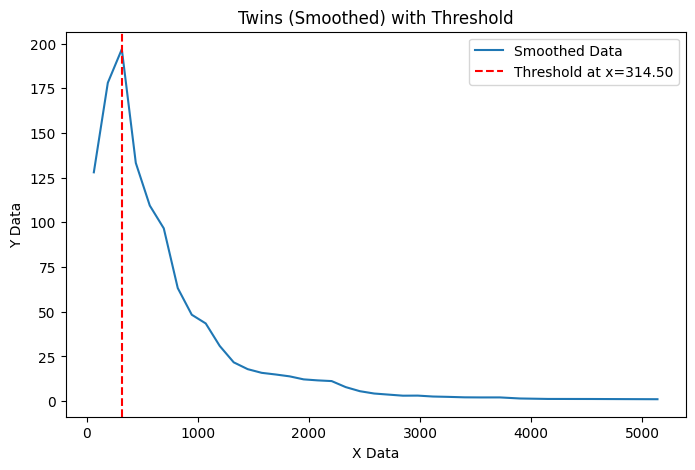

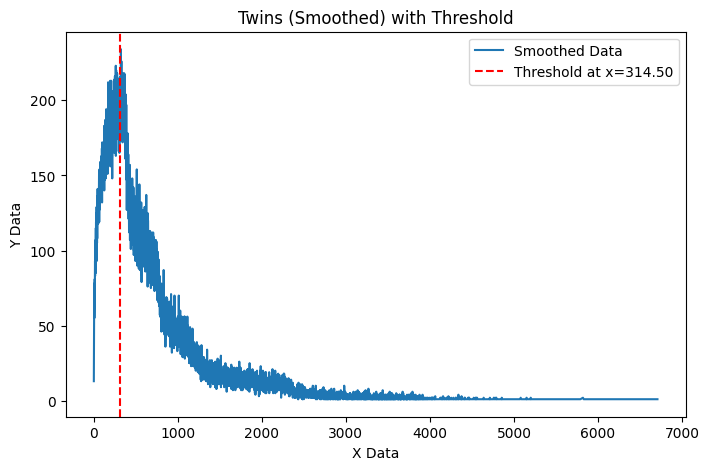

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def smooth_data(x_data, y_data, group_size):
    """
    Smooths the data by partitioning the x and y arrays into groups 
    of length `group_size` and computing the mean within each group.
    
    Parameters:
        x_data (array-like): The x-values (assumed sorted in ascending order).
        y_data (array-like): The y-values.
        group_size (int): The number of data points to include in each group.
    
    Returns:
        tuple: (smoothed_x, smoothed_y) as numpy arrays containing the group means.
    """
    num_groups = len(x_data) // group_size  # Only full groups are considered
    smoothed_x = []
    smoothed_y = []
    
    for i in range(num_groups):
        # Slice out the current group for both x and y values.
        group_x = x_data[i * group_size: (i + 1) * group_size]
        group_y = y_data[i * group_size: (i + 1) * group_size]
        
        # Compute the mean of the group.
        smoothed_x.append(np.mean(group_x))
        smoothed_y.append(np.mean(group_y))
    
    return np.array(smoothed_x), np.array(smoothed_y)

def find_threshold(smoothed_x, smoothed_y):
    """
    Finds the threshold in the smoothed data as the first x-value at which
    the first derivative (estimated via finite differences) becomes negative.
    
    Parameters:
        smoothed_x (array-like): The smoothed x-values.
        smoothed_y (array-like): The smoothed y-values.
    
    Returns:
        float: The x-value at which the smoothed data first begins to decrease.
               If the data never decreases, the maximum smoothed x is returned.
    """
    # Compute finite differences.
    dx = np.diff(smoothed_x)
    dy = np.diff(smoothed_y)
    
    # Avoid division by zero issues.
    with np.errstate(divide='ignore', invalid='ignore'):
        derivative = np.where(dx != 0, dy / dx, 0)
    
    # Identify the first index where the derivative is negative.
    negative_indices = np.where(derivative < 0)[0]
    
    if negative_indices.size > 0:
        threshold_index = negative_indices[0]
        threshold = smoothed_x[threshold_index]
    else:
        threshold = smoothed_x[-1]
    
    return threshold

def plot_data(smoothed_x, smoothed_y, threshold, title="Smoothed Data with Threshold"):
    """
    Plots the smoothed data and marks the computed threshold with a vertical dashed red line.
    
    Parameters:
        smoothed_x (array-like): The smoothed x-values.
        smoothed_y (array-like): The smoothed y-values.
        threshold (float): The threshold x-value to highlight.
        title (str): The title for the plot.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(smoothed_x, smoothed_y, label="Smoothed Data")
    plt.axvline(x=threshold, color='red', linestyle='--', label=f"Threshold at x={threshold:.2f}")
    plt.xlabel("X Data")
    plt.ylabel("Y Data")
    plt.title(title)
    plt.legend()
    plt.show()

# ------------------- Main Script -------------------

# Read the data from the CSV file.
datatxt_all = pd.read_csv('primes_data_150000.txt')

# Compute value counts (sorted by the number itself) for each of the three datasets.
number_counts_primes_plus_one = datatxt_all['Primes +1'].value_counts().sort_index()
number_counts_primes_minus_one = datatxt_all['Primes -1'].value_counts().sort_index()
number_counts_primes_twins = datatxt_all['Twins'].value_counts().sort_index()

# You can adjust this divider parameter to control the group size.
divid = 53

# Store the three datasets in a dictionary for processing.
datasets = {
    "Primes +1": number_counts_primes_plus_one,
    "Primes -1": number_counts_primes_minus_one,
    "Twins": number_counts_primes_twins
}

# Process each dataset independently.
for label, data in datasets.items():
    # Convert the index (unique numbers) and their counts to numpy arrays.
    x_data = data.index.to_numpy()
    y_data = data.values
    
    print(f"\nProcessing dataset: {label}")
    print("Original max x =", x_data[-1])
    
    # Define the group size based on the maximum x value and the divider.
    # This follows the heuristic: group_size = max(x_data) // divid.
    max_x = int(x_data[-1])
    group_size = max_x // divid
    if group_size < 1:
        group_size = 1  # Ensure at least one data point per group.
    
    # Smooth the data.
    smoothed_x, smoothed_y = smooth_data(x_data, y_data, group_size=group_size)
    
    # Find the threshold in the smoothed data.
    threshold = find_threshold(smoothed_x, smoothed_y)
    print(f"Calculated Threshold for {label}: {threshold}")
    
    # Plot the smoothed data with the threshold indicated.
    plot_data(smoothed_x, smoothed_y, threshold, title=f"{label} (Smoothed) with Threshold")
    plot_data(x_data, y_data, threshold, title=f"{label} (Smoothed) with Threshold")
